In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [2]:
obs = 1000
xs = np.random.uniform(low=-10,high=10,size=(obs,1))
zs = np.random.uniform(-10,10,(obs,1))

inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


### Create the targets we will aim at

#### targets = f(x,z) = 2*x - 3*z + 5 + noise

In [3]:
noise = np.random.uniform(-1,1,(obs,1))

targ = 2*xs - 3*zs + 5 + noise

print(targ.shape)

(1000, 1)


### Plot of the training data

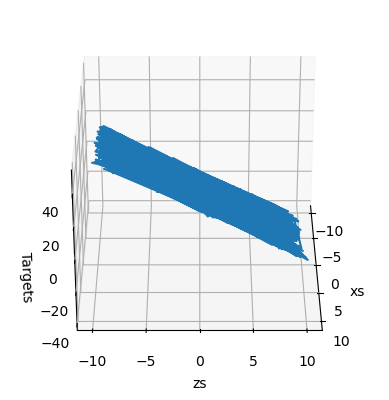

In [4]:
from IPython.display import clear_output
import time
var = 0
while var <= 360:
    clear_output(wait=False)
    
    # to use a 3d plot the obj should have a certan shape, then we need to reshape them.
    targ = targ.reshape(obs,)
    xs = xs.reshape(obs,)
    zs = zs.reshape(obs,)

    # Declare the figure
    fig = plt.figure()

    # A method to create the 3d plot
    ax = fig.add_subplot(111,projection='3d')

    # Choosing the axes
    ax.plot(xs, zs, targ)

    # Setting the labels
    ax.set_xlabel('xs')
    ax.set_ylabel('zs')
    ax.set_zlabel('Targets')

    # Changing the azim parameter to 100 to plot the data from different angles
    # To change the angle you can just change the azim number
    ax.view_init(azim=var)
    
    # Show the plot
    plt.show()
    
    # To reshape them back
    targ = targ.reshape(obs,1)
    xs = xs.reshape(obs,)
    zs = zs.reshape(obs,)
    
    time.sleep(0.5)
    var += 10

### Initialize variable

#### targets = f(x,z) = 2*x - 3*z + 5 + noise

In [5]:
init_range = 0.1

weights = np.random.uniform(-init_range,init_range,size=(2,1))

biases = np.random.uniform(-init_range,init_range,size=1)

print(weights)
print(biases)

[[-0.03465761]
 [-0.07478342]]
[0.09656832]


### Set a learning rate

In [6]:
learning_rate = 0.02

### Train the model

In [8]:
print(weights.shape, biases.shape, inputs.shape, targ.shape)

(2, 1) (1,) (1000, 2) (1000, 1)


In [13]:
for i in range(100):
    
    # Calculate the outputs for given weights and biases
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targ
    
    # Calculate a loss function that compares the outputs to the targets
    loss = np.sum(deltas**2) / 2 / obs
    
    # Print the loss to analise it
    print(loss)
    
    # Define the deltas scaled
    deltas_scaled = deltas / obs
   
    # Update the weghts and the biases following the gradient dissent methodology
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

0.17725901409495207
0.1771064517860537
0.17695990712045148
0.17681914273918636
0.17668393064564783
0.1765540518362875
0.17642929594589787
0.17630946090688288
0.17619435262196828
0.17608378464982205
0.1759775779030739
0.1758755603582472
0.1757775667771316
0.17568343843914683
0.17559302288426115
0.1755061736660522
0.17542275011450723
0.17534261710817806
0.17526564485532622
0.17519170868369718
0.17512068883858906
0.17505247028888543
0.17498694254073865
0.17492399945860274
0.1748635390933252
0.1748054635170195
0.17474967866445126
0.17469609418067994
0.17464462327471086
0.17459518257891937
0.17454769201402018
0.17450207465936268
0.17445825662834147
0.17441616694872333
0.17437573744769203
0.1743369026414291
0.1742995996290492
0.17426376799071971
0.17422934968979806
0.17419628897882955
0.1741645323092535
0.17413402824466984
0.17410472737752775
0.17407658224909994
0.17404954727261343
0.1740235786594128
0.17399863434803545
0.17397467393608376
0.17395165861478654
0.17392955110613917
0.1739083156

### Analising the weights and the biases

#### targets = f(x,z) = 2*x - 3*z + 5 + noise

In [14]:
print(weights,biases)

[[ 2.0005042 ]
 [-3.00141857]] [4.97488974]


### Plot of outputs x targets

The closest this plot is to a 45 degree line, the closer target and output values are.

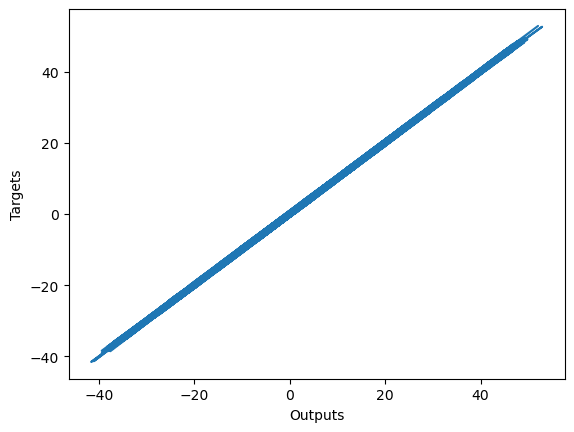

In [15]:
plt.plot(outputs,targ)
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()